# Mapas Mundo com casos confirmados, mortes e recuperados

- Todos os dados aqui utilizados são referentes até ao dia 31-05-2020.
- Os dados utilizados foram encontrados em [CSSEGISandData](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series).
- E a shape utilizada no mapa mundo foi obtida no [Natural Earth](https://www.naturalearthdata.com/).

**Ligação ao Qgis**

In [1]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'/usr/local/share/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("/usr/local", True)  
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	/usr/local/./svg/
		C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/carin/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/carin/AppData/Roaming/python3\profiles\default/qgis-auth.db



# Mapa mundo com casos confirmados

In [5]:
global_gpkg = "global_cases_confirmed.gpkg"
conn = ogr.Open(global_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(global_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer ne_10m_admin_0_countries loaded
Layer Casos_confirmados loaded
Layer layer_styles loaded


In [6]:
global_map = QgsProject.instance().mapLayersByName('ne_10m_admin_0_countries')[0]
cases_confirmed = QgsProject.instance().mapLayersByName('Casos_confirmados')[0]

In [11]:
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

xt = global_map.extent()
#print(xt)
width  = 900
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([cases_confirmed, global_map,])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

Gerar mapa com 900 por 434


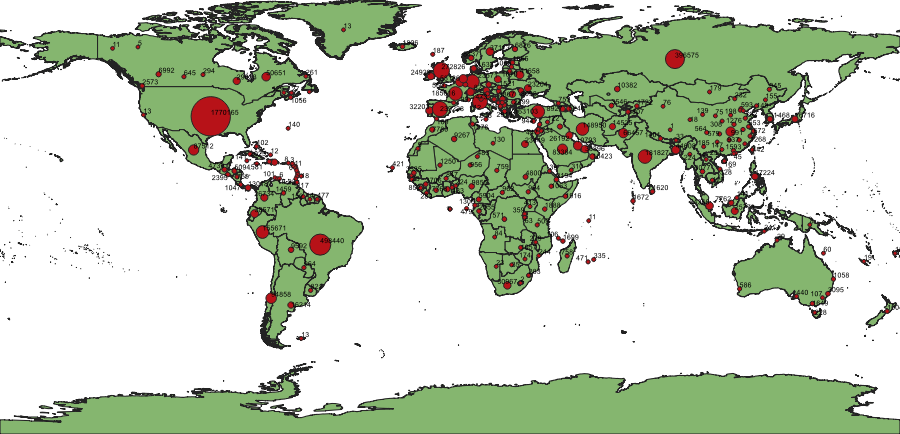

In [12]:
from IPython.display import Image

imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

# Mapa mundo com mortes

In [2]:
global_deaths_gpkg = "global_deaths.gpkg"
conn = ogr.Open(global_deaths_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(global_deaths_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer ne_10m_admin_0_countries loaded
Layer Mortes loaded
Layer layer_styles loaded


In [3]:
global_map = QgsProject.instance().mapLayersByName('ne_10m_admin_0_countries')[0]
deaths = QgsProject.instance().mapLayersByName('Mortes')[0]

In [4]:
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

xt = global_map.extent()
#print(xt)
width  = 900
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([deaths, global_map,])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

Gerar mapa com 900 por 434


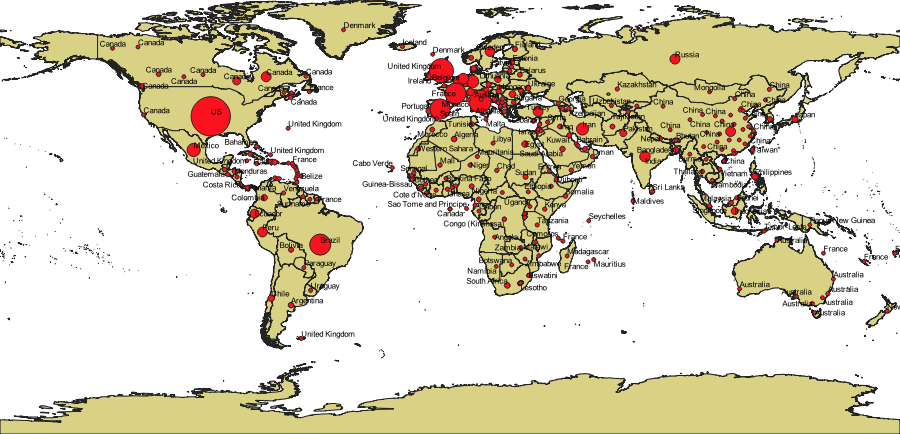

In [5]:
from IPython.display import Image

imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

# Mapa mundo com recuperados

In [6]:
global_recovered_gpkg = "global_recovered.gpkg"
conn = ogr.Open(global_recovered_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(global_recovered_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer ne_10m_admin_0_countries loaded
Layer Curados loaded
Layer layer_styles loaded


In [7]:
global_map = QgsProject.instance().mapLayersByName('ne_10m_admin_0_countries')[0]
recovered = QgsProject.instance().mapLayersByName('Curados')[0]

In [8]:
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

xt = global_map.extent()
#print(xt)
width  = 900
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([recovered, global_map,])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

Gerar mapa com 900 por 434


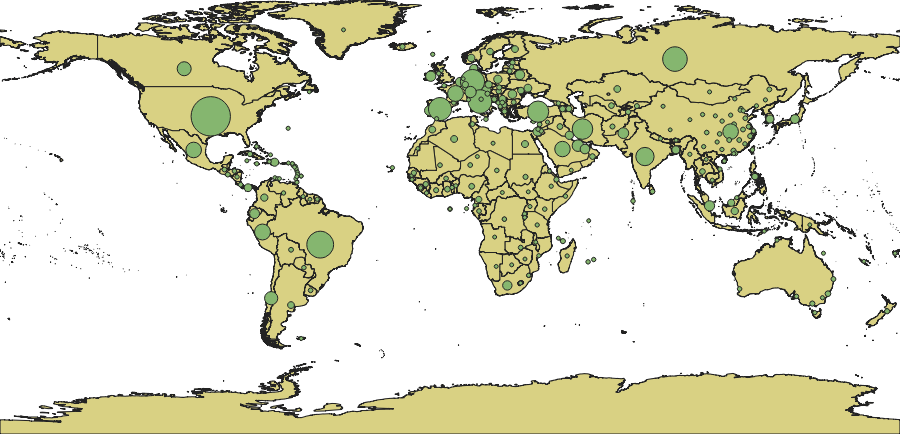

In [9]:
from IPython.display import Image

imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )